## Feature Reduction

c:\Users\fenst\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\preprocessing\_encoders.py:975: FutureWarning: `sparse` was renamed to `sparse_output` in version 1.2 and will be removed in 1.4. `sparse_output` is ignored unless you leave `sparse` to its default value.
  warnings.warn(


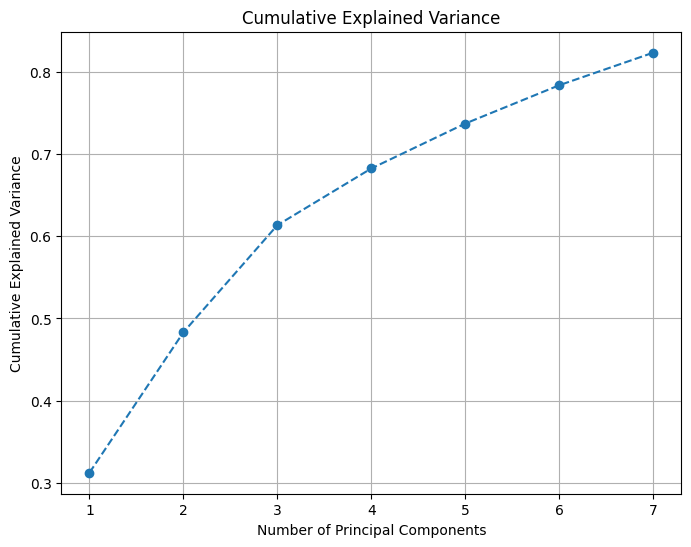

In [119]:
import matplotlib.pylab as plt
import numpy as np
import sklearn as sk
import pandas as pd
from sklearn.decomposition import PCA
from sklearn.preprocessing import OneHotEncoder
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error
from sklearn.model_selection import train_test_split

def r2_score(y_true, y_pred):
    # Calculate the mean of the true target values
    y_mean = np.mean(y_true)
    
    # Calculate the total sum of squares (TSS)
    tss = np.sum((y_true - y_mean) ** 2)
    
    # Calculate the residual sum of squares (RSS)
    rss = np.sum((y_true - y_pred) ** 2)
    
    # Calculate R^2 score
    r2 = 1 - (rss / tss)
    
    return r2


#Load the CSV file
data = pd.read_csv('Data_EV.csv')


def Create_data(one_hot):

    #Prepare the data
    X = data.drop(columns=['Number of Evs per capita 2022'])
    y = data['Number of Evs per capita 2022']  # Dependent variable
    X = X.drop(columns=['State'])

    if one_hot == False:
        return X, y
    else:
        encoder = OneHotEncoder(sparse=False)

        one_hot_encoded = encoder.fit_transform(data[['Political Affiliation']])
        feature_names = encoder.categories_[0]
        one_hot_encoded_df = pd.DataFrame(one_hot_encoded, columns=feature_names)
        X = pd.concat([X, one_hot_encoded_df], axis=1)
        X = X.drop(columns=['Political Affiliation'])

        return X, y


X,y = Create_data(True)
# Standardize the features
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

#Perform PCA
pca = PCA(n_components=7)  # Specify the number of principal components
X_pca = pca.fit_transform(X_scaled)

explained_variance_ratio = pca.explained_variance_ratio_
cumulative_variance = np.cumsum(explained_variance_ratio)

plt.figure(figsize=(8, 6))
plt.plot(range(1, len(cumulative_variance) + 1), cumulative_variance, marker='o', linestyle='--')
plt.title('Cumulative Explained Variance')
plt.xlabel('Number of Principal Components')
plt.ylabel('Cumulative Explained Variance')
plt.grid(True)
plt.show()



In [120]:
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)
threshold = 0.95
# Calculate the correlation matrix
correlation_matrix = pd.DataFrame(X_scaled, columns=X.columns).corr()

# Display the correlation matrix with gradient background
correlation_matrix_style = correlation_matrix.style.background_gradient(cmap='coolwarm')


# Print the styled correlation matrix
print("Correlation Matrix:")
correlation_matrix_style

variables_above_threshold = {}
for column in correlation_matrix.columns:
    variables_above_threshold[column] = (correlation_matrix[column].abs() > threshold).sum()

df_variables_above_threshold = pd.DataFrame(variables_above_threshold.items(), columns=['Variable', 'Count'])
pd.set_option('display.max_rows', None)
pd.set_option('display.max_columns', None)
# Print the count of variables above the threshold for each variable
print("Number of variables with correlation above", threshold)
print(df_variables_above_threshold)

Correlation Matrix:
Number of variables with correlation above 0.95
                                             Variable  Count
0         Population estimates, July 1, 2023, (V2023)      1
1   Population, percent change - April 1, 2020 (es...      1
2                             Female persons, percent      1
3                      Veterans per capita, 2018-2022      1
4            Foreign born persons, percent, 2018-2022      1
5     Housing units per capita, July 1, 2022, (V2022)      1
6         Owner-occupied housing unit rate, 2018-2022      1
7   Median value of owner-occupied housing units, ...      1
8                    Persons per household, 2018-2022      1
9   Living in same house 1 year ago, percent of pe...      1
10     Households with a computer, percent, 2018-2022      1
11  Households with a broadband Internet subscript...      1
12  High school graduate or higher, percent of per...      1
13  Bachelor's degree or higher, percent of person...      1
14  In civilian l

In [121]:
correlation_matrix_style

,"Population estimates, July 1, 2023, (V2023)","Population, percent change - April 1, 2020 (estimates base) to July 1, 2023, (V2023)","Female persons, percent","Veterans per capita, 2018-2022","Foreign born persons, percent, 2018-2022","Housing units per capita, July 1, 2022, (V2022)","Owner-occupied housing unit rate, 2018-2022","Median value of owner-occupied housing units, 2018-2022","Persons per household, 2018-2022","Living in same house 1 year ago, percent of persons age 1 year+, 2018-2022","Households with a computer, percent, 2018-2022","Households with a broadband Internet subscription, percent, 2018-2022","High school graduate or higher, percent of persons age 25 years+, 2018-2022","Bachelor's degree or higher, percent of persons age 25 years+, 2018-2022","In civilian labor force, total, percent of population age 16 years+, 2018-2022","Total retail sales per capita, 2017 ($1,000)","Mean travel time to work (minutes), workers age 16 years+, 2018-2022","Median household income (in 2022 dollars), 2018-2022","Per capita income in past 12 months (in 2022 dollars), 2018-2022","Persons in poverty, percent","Total employer establishments per capita, 2021","Total employment percentage, 2021","Total employment, percent change, 2020-2021","All employer firms per capita, Reference year 2017","Population per square mile, 2020","Population per square mile, 2010","Land area in square miles, 2020","Land area in square miles, 2010",Charging Stations,Total Chargers Chargers,Auto sales per capita 2023,Number of Evs per capita 2018,Number of Evs per capita 2019,Number of Evs per capita 2020,Number of EVs per capita 2021,Blue,Red
"Population estimates, July 1, 2023, (V2023)",1.000000,-0.062418,0.202230,-0.440152,0.619947,-0.412176,-0.516440,0.246128,0.358483,0.179676,0.215247,0.225649,-0.536843,0.151418,-0.011389,-0.091392,0.519694,0.165246,0.174565,0.076749,-0.232097,0.137288,-0.045862,-0.234675,0.165527,0.158431,0.145782,0.145810,0.231805,0.202954,-0.031043,0.452313,0.440982,0.445475,0.448094,0.039770,-0.039770
"Population, percent change - April 1, 2020 (estimates base) to July 1, 2023, (V2023)",-0.062418,1.000000,-0.079888,0.324850,-0.166489,-0.100237,0.284437,-0.127070,0.090453,-0.495314,0.280011,0.116262,0.085108,-0.127021,0.021587,-0.071829,-0.275497,-0.185144,-0.259842,-0.176787,0.122591,-0.117851,0.621643,-0.021351,-0.223368,-0.239165,0.086171,0.086144,0.000947,0.012000,0.107804,-0.176487,-0.165005,-0.149149,-0.121849,-0.187792,0.187792
"Female persons, percent",0.202230,-0.079888,1.000000,-0.339854,0.135438,0.055600,0.004298,-0.181146,-0.125523,0.644129,-0.394920,-0.258700,-0.462332,0.065836,-0.363569,-0.300391,0.642933,-0.171322,-0.021126,0.292445,-0.522113,-0.023861,-0.045982,-0.497777,0.475414,0.473613,-0.642809,-0.642847,0.151340,0.141153,-0.078581,-0.124161,-0.119577,-0.102164,-0.093610,0.093710,-0.093710
"Veterans per capita, 2018-2022",-0.440152,0.324850,-0.339854,1.000000,-0.450250,0.398069,0.354370,-0.149366,-0.243279,-0.464840,-0.050471,-0.192706,0.271852,-0.338901,-0.331443,-0.008904,-0.420810,-0.279778,-0.283001,0.074717,0.193959,-0.477801,0.117837,0.084513,-0.522322,-0.528532,0.329649,0.329745,-0.103276,-0.081078,0.068190,-0.169181,-0.169734,-0.190947,-0.199676,-0.152164,0.152164
"Foreign born persons, percent, 2018-2022",0.619947,-0.166489,0.135438,-0.450250,1.000000,-0.596542,-0.740034,0.690859,0.511796,0.216048,0.528098,0.575752,-0.336088,0.518864,0.190983,-0.020455,0.665007,0.651250,0.618538,-0.296290,-0.093106,0.171453,-0.476067,-0.039240,0.576417,0.568207,0.027088,0.027022,0.158942,0.141897,0.026239,0.629624,0.646759,0.678243,0.702332,0.444626,-0.444626
"Housing units per capita, July 1, 2022, (V2022)",-0.412176,-0.100237,0.055600,0.398069,-0.596542,1.000000,0.496346,-0.522581,-0.832352,0.126316,-0.525243,-0.493413,0.316371,-0.209133,-0.248363,0.235123,-0.297250,-0.465551,-0.228466,0.218828,0.293054,-0.103086,0.003143,0.312051,-0.232178,-0.227338,-0.133201,-0.133049,-0.073694,-0.063201,0.137479,-0.498012,-0.4

In [122]:
X,y = Create_data(True)


X = X.drop(columns=['Land area in square miles, 2010'])
X = X.drop(columns=['All employer firms per capita, Reference year 2017'])
X = X.drop(columns=['Total Chargers Chargers'])
X = X.drop(columns=['Number of Evs per capita 2018'])
X = X.drop(columns=['Number of Evs per capita 2019'])
X = X.drop(columns=['Number of Evs per capita 2020'])
X = X.drop(columns=['Population estimates, July 1, 2023, (V2023)'])
X = X.drop(columns=['Population per square mile, 2010'])





c:\Users\fenst\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\preprocessing\_encoders.py:975: FutureWarning: `sparse` was renamed to `sparse_output` in version 1.2 and will be removed in 1.4. `sparse_output` is ignored unless you leave `sparse` to its default value.
  warnings.warn(


In [123]:
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

# Calculate the correlation matrix
correlation_matrix = pd.DataFrame(X_scaled, columns=X.columns).corr()

# Display the correlation matrix with gradient background
correlation_matrix_style = correlation_matrix.style.background_gradient(cmap='coolwarm')


# Print the styled correlation matrix
print("Correlation Matrix:")
correlation_matrix_style

variables_above_threshold = {}
for column in correlation_matrix.columns:
    variables_above_threshold[column] = (correlation_matrix[column].abs() > threshold).sum()

df_variables_above_threshold = pd.DataFrame(variables_above_threshold.items(), columns=['Variable', 'Count'])
pd.set_option('display.max_rows', None)
pd.set_option('display.max_columns', None)
# Print the count of variables above the threshold for each variable
print("Number of variables with correlation above", threshold)
print(df_variables_above_threshold)

Correlation Matrix:
Number of variables with correlation above 0.95
                                             Variable  Count
0   Population, percent change - April 1, 2020 (es...      1
1                             Female persons, percent      1
2                      Veterans per capita, 2018-2022      1
3            Foreign born persons, percent, 2018-2022      1
4     Housing units per capita, July 1, 2022, (V2022)      1
5         Owner-occupied housing unit rate, 2018-2022      1
6   Median value of owner-occupied housing units, ...      1
7                    Persons per household, 2018-2022      1
8   Living in same house 1 year ago, percent of pe...      1
9      Households with a computer, percent, 2018-2022      1
10  Households with a broadband Internet subscript...      1
11  High school graduate or higher, percent of per...      1
12  Bachelor's degree or higher, percent of person...      1
13  In civilian labor force, total, percent of pop...      1
14       Total re

In [124]:
print("Correlation Matrix:")
correlation_matrix_style

Correlation Matrix:


,"Population, percent change - April 1, 2020 (estimates base) to July 1, 2023, (V2023)","Female persons, percent","Veterans per capita, 2018-2022","Foreign born persons, percent, 2018-2022","Housing units per capita, July 1, 2022, (V2022)","Owner-occupied housing unit rate, 2018-2022","Median value of owner-occupied housing units, 2018-2022","Persons per household, 2018-2022","Living in same house 1 year ago, percent of persons age 1 year+, 2018-2022","Households with a computer, percent, 2018-2022","Households with a broadband Internet subscription, percent, 2018-2022","High school graduate or higher, percent of persons age 25 years+, 2018-2022","Bachelor's degree or higher, percent of persons age 25 years+, 2018-2022","In civilian labor force, total, percent of population age 16 years+, 2018-2022","Total retail sales per capita, 2017 ($1,000)","Mean travel time to work (minutes), workers age 16 years+, 2018-2022","Median household income (in 2022 dollars), 2018-2022","Per capita income in past 12 months (in 2022 dollars), 2018-2022","Persons in poverty, percent","Total employer establishments per capita, 2021","Total employment percentage, 2021","Total employment, percent change, 2020-2021","Population per square mile, 2020","Land area in square miles, 2020",Charging Stations,Auto sales per capita 2023,Number of EVs per capita 2021,Blue,Red
"Population, percent change - April 1, 2020 (estimates base) to July 1, 2023, (V2023)",1.000000,-0.079888,0.324850,-0.166489,-0.100237,0.284437,-0.127070,0.090453,-0.495314,0.280011,0.116262,0.085108,-0.127021,0.021587,-0.071829,-0.275497,-0.185144,-0.259842,-0.176787,0.122591,-0.117851,0.621643,-0.223368,0.086171,0.000947,0.107804,-0.121849,-0.187792,0.187792
"Female persons, percent",-0.079888,1.000000,-0.339854,0.135438,0.055600,0.004298,-0.181146,-0.125523,0.644129,-0.394920,-0.258700,-0.462332,0.065836,-0.363569,-0.300391,0.642933,-0.171322,-0.021126,0.292445,-0.522113,-0.023861,-0.045982,0.475414,-0.642809,0.151340,-0.078581,-0.093610,0.093710,-0.093710
"Veterans per capita, 2018-2022",0.324850,-0.339854,1.000000,-0.450250,0.398069,0.354370,-0.149366,-0.243279,-0.464840,-0.050471,-0.192706,0.271852,-0.338901,-0.331443,-0.008904,-0.420810,-0.279778,-0.283001,0.074717,0.193959,-0.477801,0.117837,-0.522322,0.329649,-0.103276,0.068190,-0.199676,-0.152164,0.152164
"Foreign born persons, percent, 2018-2022",-0.166489,0.135438,-0.450250,1.000000,-0.596542,-0.740034,0.690859,0.511796,0.216048,0.528098,0.575752,-0.336088,0.518864,0.190983,-0.020455,0.665007,0.651250,0.618538,-0.296290,-0.093106,0.171453,-0.476067,0.576417,0.027088,0.158942,0.026239,0.702332,0.444626,-0.444626
"Housing units per capita, July 1, 2022, (V2022)",-0.100237,0.055600,0.398069,-0.596542,1.000000,0.496346,-0.522581,-0.832352,0.126316,-0.525243,-0.493413,0.316371,-0.209133,-0.248363,0.235123,-0.297250,-0.465551,-0.228466,0.218828,0.293054,-0.103086,0.003143,-0.232178,-0.133201,-0.073694,0.137479,-0.501888,-0.105281,0.105281
"Owner-occupied housing unit rate, 2018-2022",0.284437,0.004298,0.354370,-0.740034,0.496346,1.000000,-0.531368,-0.385162,0.009349,-0.291377,-0.285459,0.445134,-0.225004,-0.112186,0.007322,-0.381940,-0.353658,-0.347432,-0.015151,0.093825,-0.091093,0.457379,-0.296305,-0.161012,-0.238134,0.006015,-0.522742,-0.153634,0.153634
"Median value of owner-occupied housing units, 2018-2022",-0.127070,-0.181146,-0.149366,0.690859,-0.522581,-0.531368,1.000000,0.570094,-0.009956,0.650748,0.700808,0.088231,0.578279,0.271183,0.162325,0.385614,0.784290,0.637756,-0.523568,0.196886,0.090481,-0.479444,0.303922,0.038356,-0.023721,0.001077,0.876628,0.548112,-0.548112
"Persons per household, 2018-2022",0.090453,-0.125523,-0.243279,0.511796,-0.832352,-0.385162,0.570094,1.000000,-0.064028,0.453927,0.325468,-0.346942,0.048678,-0.001939,-0.270896,0.277124,0.356949,0.042281,-0.083337,-0.254257,-0.187665,-0.108181,0.046473,0.271048,0.079911,-0.012911,0.542299,0.035507,-0.035507
"Living in same house 1 year ago, percent of perso

In [125]:
X,y = Create_data(True)

X = X.drop(columns=['Red'])
X = X.drop(columns=['Land area in square miles, 2010'])
X = X.drop(columns=['All employer firms per capita, Reference year 2017'])
X = X.drop(columns=['Total Chargers Chargers'])
X = X.drop(columns=['Number of Evs per capita 2018'])
X = X.drop(columns=['Number of Evs per capita 2019'])
X = X.drop(columns=['Number of Evs per capita 2020'])
X = X.drop(columns=['Population estimates, July 1, 2023, (V2023)'])
X = X.drop(columns=['Population per square mile, 2010'])

#Scale X
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

#Scale y
scaler = StandardScaler()
y_scaled = scaler.fit_transform(y.values.reshape(-1, 1))




c:\Users\fenst\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\preprocessing\_encoders.py:975: FutureWarning: `sparse` was renamed to `sparse_output` in version 1.2 and will be removed in 1.4. `sparse_output` is ignored unless you leave `sparse` to its default value.
  warnings.warn(


In [126]:
def run_linear_regression(X, y):
    # Split data into train and test sets
    X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)
    # Create and fit linear regression model
    model = LinearRegression()
    model.fit(X_train, y_train)
    # Evaluate model on train set
    train_r2 = r2_score(y_train, model.predict(X_train))
    # Evaluate model on test set
    test_r2 = r2_score(y_test, model.predict(X_test))
    return model, train_r2, test_r2

def remove_feature_with_smallest_contribution(X, y, model):
    # Get coefficients
    coefficients = model.coef_
    # Find index of feature with smallest coefficient magnitude
    feature_to_remove_index = np.argmin(np.abs(coefficients))
    # Remove feature with smallest coefficient magnitude
    X_updated = np.delete(X, feature_to_remove_index, axis=1)
    return X_updated

model, train_r2, test_r2 = run_linear_regression(X_scaled, y_scaled)

# Print coefficients of initial regression
print("Initial coefficients:", model.coef_)
print("Initial train R2:", train_r2)
print("Initial test R2:", test_r2)


Initial coefficients: [[-0.0908168  -0.12669806  0.19565608 -0.04847484  0.02643307  0.0920636
  -0.13611718  0.42542612 -0.01558169 -0.10805268  0.04686119 -0.18920648
  -0.03172594  0.16171648  0.04107631  0.00144557 -0.86302774  0.49169856
  -0.06901562  0.067972    0.16045404  0.04288053  0.22240239 -0.01771581
   0.1022145   0.04466926  1.18680856  0.13779093]]
Initial train R2: 0.9990149723657722
Initial test R2: 0.931490101758543


In [127]:
# Retrieve coefficients
coefficients = model.coef_

feature_names = X.columns
table ={}
for i in range(len(X.columns)):
    table[feature_names[i]] = model.coef_[0][i]


# Print the DataFrame
df = pd.DataFrame(table.items(), columns=['Feature', 'Coefficient'])  
pd.set_option('display.max_columns', None)  # Display all columns
pd.set_option('display.width', 100)
print(df)



                                              Feature  Coefficient
0   Population, percent change - April 1, 2020 (es...    -0.090817
1                             Female persons, percent    -0.126698
2                      Veterans per capita, 2018-2022     0.195656
3            Foreign born persons, percent, 2018-2022    -0.048475
4     Housing units per capita, July 1, 2022, (V2022)     0.026433
5         Owner-occupied housing unit rate, 2018-2022     0.092064
6   Median value of owner-occupied housing units, ...    -0.136117
7                    Persons per household, 2018-2022     0.425426
8   Living in same house 1 year ago, percent of pe...    -0.015582
9      Households with a computer, percent, 2018-2022    -0.108053
10  Households with a broadband Internet subscript...     0.046861
11  High school graduate or higher, percent of per...    -0.189206
12  Bachelor's degree or higher, percent of person...    -0.031726
13  In civilian labor force, total, percent of pop...     0.16

Most Significant contribution to this regression is the previous years number of EVs.  We will remove this to try to see if more demographic like information could be used.

In [128]:

X = X.drop(columns=['Number of EVs per capita 2021'])
#Scale X
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

#Scale y
scaler = StandardScaler()
y_scaled = scaler.fit_transform(y.values.reshape(-1, 1))

model, train_r2, test_r2 = run_linear_regression(X_scaled, y_scaled)

# Print coefficients of initial regression
print("Initial coefficients:", model.coef_)
print("Initial train R2:", train_r2)
print("Initial test R2:", test_r2)

Initial coefficients: [[ 0.38170617 -0.32159456 -0.40679058  0.33562933 -0.02922947 -0.11345235
   0.7230609  -1.28201732  0.45671849  1.70982453 -0.63238659  0.4237783
   0.21455028 -0.21498017 -0.15790045  0.45056439  0.96410019 -0.83196733
   0.43470507 -0.44762234 -0.35221324 -0.12027323 -0.31262618 -0.263919
  -0.71434224 -0.06046607 -0.59550186]]
Initial train R2: 0.9477956280597924
Initial test R2: -0.7563172446647994


In [129]:
# Retrieve coefficients
coefficients = model.coef_

feature_names = X.columns
table ={}
for i in range(len(X.columns)):
    table[feature_names[i]] = model.coef_[0][i]


# Print the DataFrame
df = pd.DataFrame(table.items(), columns=['Feature', 'Coefficient'])  
pd.set_option('display.max_columns', None)  # Display all columns
pd.set_option('display.width', 100)
print(df)


                                              Feature  Coefficient
0   Population, percent change - April 1, 2020 (es...     0.381706
1                             Female persons, percent    -0.321595
2                      Veterans per capita, 2018-2022    -0.406791
3            Foreign born persons, percent, 2018-2022     0.335629
4     Housing units per capita, July 1, 2022, (V2022)    -0.029229
5         Owner-occupied housing unit rate, 2018-2022    -0.113452
6   Median value of owner-occupied housing units, ...     0.723061
7                    Persons per household, 2018-2022    -1.282017
8   Living in same house 1 year ago, percent of pe...     0.456718
9      Households with a computer, percent, 2018-2022     1.709825
10  Households with a broadband Internet subscript...    -0.632387
11  High school graduate or higher, percent of per...     0.423778
12  Bachelor's degree or higher, percent of person...     0.214550
13  In civilian labor force, total, percent of pop...    -0.21

Removal of the previous years EVs had a significant impact.  This feature contributed so significantly to the analysis that our test R2 is basically zero.

Next we will remove the other infrastructure data to see if demographics alone can tell a story.


In [130]:
X = X.drop(columns=['Auto sales per capita 2023'])
X = X.drop(columns=['Charging Stations'])

#Scale X
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

#Scale y
scaler = StandardScaler()
y_scaled = scaler.fit_transform(y.values.reshape(-1, 1))


model, train_r2, test_r2 = run_linear_regression(X_scaled, y_scaled)

# Print coefficients of initial regression
print("Initial coefficients:", model.coef_)
print("Initial train R2:", train_r2)
print("Initial test R2:", test_r2)

Initial coefficients: [[ 1.49937205e-01 -4.81772013e-01 -1.20272404e-01  2.21244833e-01
  -2.03556476e-02  1.28061846e-02  8.49906085e-01 -8.52659705e-01
   5.13653084e-01  1.64009374e+00 -7.61679699e-01 -1.05369969e-03
   3.60814804e-01 -1.34014848e-01 -9.06153319e-02  5.77701441e-02
   4.42548408e-02 -2.54147404e-01  7.40797284e-02 -5.06957613e-01
  -3.21328094e-01  7.20811908e-04 -1.35626840e-01 -4.05714595e-01
  -4.21535800e-01]]
Initial train R2: 0.9364650717126857
Initial test R2: 0.5219069063414681


In [131]:
feature_names = X.columns
table ={}
for i in range(len(X.columns)):
    table[feature_names[i]] = model.coef_[0][i]


# Print the DataFrame
df = pd.DataFrame(table.items(), columns=['Feature', 'Coefficient'])  
pd.set_option('display.max_columns', None)  # Display all columns
pd.set_option('display.width', 100)
print(df)


                                              Feature  Coefficient
0   Population, percent change - April 1, 2020 (es...     0.149937
1                             Female persons, percent    -0.481772
2                      Veterans per capita, 2018-2022    -0.120272
3            Foreign born persons, percent, 2018-2022     0.221245
4     Housing units per capita, July 1, 2022, (V2022)    -0.020356
5         Owner-occupied housing unit rate, 2018-2022     0.012806
6   Median value of owner-occupied housing units, ...     0.849906
7                    Persons per household, 2018-2022    -0.852660
8   Living in same house 1 year ago, percent of pe...     0.513653
9      Households with a computer, percent, 2018-2022     1.640094
10  Households with a broadband Internet subscript...    -0.761680
11  High school graduate or higher, percent of per...    -0.001054
12  Bachelor's degree or higher, percent of person...     0.360815
13  In civilian labor force, total, percent of pop...    -0.13

Should evaluate above for different train test split

In [132]:
X = X.drop(columns=['Owner-occupied housing unit rate, 2018-2022'])
X = X.drop(columns=['Total retail sales per capita, 2017 ($1,000)'])
X = X.drop(columns=['Mean travel time to work (minutes), workers age 16 years+, 2018-2022'])
X = X.drop(columns=['Median household income (in 2022 dollars), 2018-2022'])
X = X.drop(columns=['Blue'])

scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

#Scale y
scaler = StandardScaler()
y_scaled = scaler.fit_transform(y.values.reshape(-1, 1))


model, train_r2, test_r2 = run_linear_regression(X_scaled, y_scaled)

# Print coefficients of initial regression
print("Initial coefficients:", model.coef_)
print("Initial train R2:", train_r2)
print("Initial test R2:", test_r2)	

Initial coefficients: [[-0.02017848 -0.29893477  0.14732456  0.24290203  0.01186793  0.48970643
  -0.32744086  0.24422022  1.1055888  -0.51312765  0.03491631  0.45875151
   0.08828239 -0.27403183  0.22818931 -0.44499411 -0.25565649  0.0467818
  -0.03423828 -0.34930316]]
Initial train R2: 0.9186238287594545
Initial test R2: 0.5561756075437134


In [133]:
feature_names = X.columns
table ={}
for i in range(len(X.columns)):
    table[feature_names[i]] = model.coef_[0][i]


# Print the DataFrame
df = pd.DataFrame(table.items(), columns=['Feature', 'Coefficient'])  
pd.set_option('display.max_columns', None)  # Display all columns
pd.set_option('display.width', 100)
print(df)

                                              Feature  Coefficient
0   Population, percent change - April 1, 2020 (es...    -0.020178
1                             Female persons, percent    -0.298935
2                      Veterans per capita, 2018-2022     0.147325
3            Foreign born persons, percent, 2018-2022     0.242902
4     Housing units per capita, July 1, 2022, (V2022)     0.011868
5   Median value of owner-occupied housing units, ...     0.489706
6                    Persons per household, 2018-2022    -0.327441
7   Living in same house 1 year ago, percent of pe...     0.244220
8      Households with a computer, percent, 2018-2022     1.105589
9   Households with a broadband Internet subscript...    -0.513128
10  High school graduate or higher, percent of per...     0.034916
11  Bachelor's degree or higher, percent of person...     0.458752
12  In civilian labor force, total, percent of pop...     0.088282
13  Per capita income in past 12 months (in 2022 d...    -0.27

Should evaluate the above for train test split difference

In [134]:
X = X.drop(columns=['Median value of owner-occupied housing units, 2018-2022'])
X = X.drop(columns=["Persons in poverty, percent"])
X = X.drop(columns=["Total employer establishments per capita, 2021"])
X = X.drop(columns=["Total employment percentage, 2021"])

scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

#Scale y
scaler = StandardScaler()
y_scaled = scaler.fit_transform(y.values.reshape(-1, 1))


model, train_r2, test_r2 = run_linear_regression(X_scaled, y_scaled)

# Print coefficients of initial regression
print("Initial coefficients:", model.coef_)
print("Initial train R2:", train_r2)
print("Initial test R2:", test_r2)	

Initial coefficients: [[ 0.01968142 -0.27386469  0.21410006  0.3798984  -0.34715756 -0.18555301
   0.08755549  0.71015545 -0.41085969  0.04902837  0.78628698 -0.52914303
  -0.34119344 -0.14477462 -0.10054861 -0.34309084]]
Initial train R2: 0.8726669275666928
Initial test R2: 0.38583739781742055


In [135]:
feature_names = X.columns
table ={}
for i in range(len(X.columns)):
    table[feature_names[i]] = model.coef_[0][i]


# Print the DataFrame
df = pd.DataFrame(table.items(), columns=['Feature', 'Coefficient'])  
pd.set_option('display.max_columns', None)  # Display all columns
pd.set_option('display.width', 100)
print(df)

                                              Feature  Coefficient
0   Population, percent change - April 1, 2020 (es...     0.019681
1                             Female persons, percent    -0.273865
2                      Veterans per capita, 2018-2022     0.214100
3            Foreign born persons, percent, 2018-2022     0.379898
4     Housing units per capita, July 1, 2022, (V2022)    -0.347158
5                    Persons per household, 2018-2022    -0.185553
6   Living in same house 1 year ago, percent of pe...     0.087555
7      Households with a computer, percent, 2018-2022     0.710155
8   Households with a broadband Internet subscript...    -0.410860
9   High school graduate or higher, percent of per...     0.049028
10  Bachelor's degree or higher, percent of person...     0.786287
11  In civilian labor force, total, percent of pop...    -0.529143
12  Per capita income in past 12 months (in 2022 d...    -0.341193
13        Total employment, percent change, 2020-2021    -0.14

In [136]:
X = X.drop(columns=['Persons per household, 2018-2022'])
X = X.drop(columns=["Population per square mile, 2020"])
X = X.drop(columns=["Land area in square miles, 2020"])

scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

#Scale y
scaler = StandardScaler()
y_scaled = scaler.fit_transform(y.values.reshape(-1, 1))


model, train_r2, test_r2 = run_linear_regression(X_scaled, y_scaled)

# Print coefficients of initial regression
print("Initial coefficients:", model.coef_)
print("Initial train R2:", train_r2)
print("Initial test R2:", test_r2)	

Initial coefficients: [[ 0.1059129   0.12663374  0.00421381  0.39102284 -0.14435095 -0.28122722
   0.18317126  0.02178795  0.34073969  0.61927036 -0.53142892 -0.344685
  -0.25993931]]
Initial train R2: 0.8183518685851063
Initial test R2: 0.2087800962819718


#############################################################################3

In [137]:
feature_names = X.columns
table ={}
for i in range(len(X.columns)):
    table[feature_names[i]] = model.coef_[0][i]


# Print the DataFrame
df = pd.DataFrame(table.items(), columns=['Feature', 'Coefficient'])  
pd.set_option('display.max_columns', None)  # Display all columns
pd.set_option('display.width', 100)
print(df)

                                              Feature  Coefficient
0   Population, percent change - April 1, 2020 (es...     0.105913
1                             Female persons, percent     0.126634
2                      Veterans per capita, 2018-2022     0.004214
3            Foreign born persons, percent, 2018-2022     0.391023
4     Housing units per capita, July 1, 2022, (V2022)    -0.144351
5   Living in same house 1 year ago, percent of pe...    -0.281227
6      Households with a computer, percent, 2018-2022     0.183171
7   Households with a broadband Internet subscript...     0.021788
8   High school graduate or higher, percent of per...     0.340740
9   Bachelor's degree or higher, percent of person...     0.619270
10  In civilian labor force, total, percent of pop...    -0.531429
11  Per capita income in past 12 months (in 2022 d...    -0.344685
12        Total employment, percent change, 2020-2021    -0.259939


the threshold for the magnitude has been changed to 0.35

In [138]:
X = X.drop(columns=['Population, percent change - April 1, 2020 (estimates base) to July 1, 2023, (V2023)'])
X = X.drop(columns=["Foreign born persons, percent, 2018-2022"])
X = X.drop(columns=["Housing units per capita, July 1, 2022, (V2022)"])
X = X.drop(columns=["Total employment, percent change, 2020-2021"])
X = X.drop(columns=["High school graduate or higher, percent of persons age 25 years+, 2018-2022"])
X = X.drop(columns=["Living in same house 1 year ago, percent of persons age 1 year+, 2018-2022"])
X = X.drop(columns=["In civilian labor force, total, percent of population age 16 years+, 2018-2022"])
X = X.drop(columns=["Per capita income in past 12 months (in 2022 dollars), 2018-2022"])


scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

#Scale y
scaler = StandardScaler()
y_scaled = scaler.fit_transform(y.values.reshape(-1, 1))


model, train_r2, test_r2 = run_linear_regression(X_scaled, y_scaled)

# Print coefficients of initial regression
print("Initial coefficients:", model.coef_)
print("Initial train R2:", train_r2)
print("Initial test R2:", test_r2)	

Initial coefficients: [[0.21130509 0.11631715 0.44994023 0.10537454 0.17695727]]
Initial train R2: 0.5080855117410805
Initial test R2: 0.30289782117647635


In [139]:
feature_names = X.columns
table ={}
for i in range(len(X.columns)):
    table[feature_names[i]] = model.coef_[0][i]


# Print the DataFrame
df = pd.DataFrame(table.items(), columns=['Feature', 'Coefficient'])  
pd.set_option('display.max_columns', None)  # Display all columns
pd.set_option('display.width', 100)
print(df)

                                             Feature  Coefficient
0                            Female persons, percent     0.211305
1                     Veterans per capita, 2018-2022     0.116317
2     Households with a computer, percent, 2018-2022     0.449940
3  Households with a broadband Internet subscript...     0.105375
4  Bachelor's degree or higher, percent of person...     0.176957


In [140]:
X = X.drop(columns=['Veterans per capita, 2018-2022'])
X = X.drop(columns=["Households with a computer, percent, 2018-2022"])


scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

#Scale y
scaler = StandardScaler()
y_scaled = scaler.fit_transform(y.values.reshape(-1, 1))


model, train_r2, test_r2 = run_linear_regression(X_scaled, y_scaled)

# Print coefficients of initial regression
print("Initial coefficients:", model.coef_)
print("Initial train R2:", train_r2)
print("Initial test R2:", test_r2)	

Initial coefficients: [[0.07835564 0.5474206  0.08408308]]
Initial train R2: 0.4538160369436849
Initial test R2: 0.34193977126209274


In [141]:
feature_names = X.columns
table ={}
for i in range(len(X.columns)):
    table[feature_names[i]] = model.coef_[0][i]


# Print the DataFrame
df = pd.DataFrame(table.items(), columns=['Feature', 'Coefficient'])  
pd.set_option('display.max_columns', None)  # Display all columns
pd.set_option('display.width', 100)
print(df)

                                             Feature  Coefficient
0                            Female persons, percent     0.078356
1  Households with a broadband Internet subscript...     0.547421
2  Bachelor's degree or higher, percent of person...     0.084083


From this the conclusion is that demographic data alone is not sufficient to be able to predict the EV population in a state.  Next we will approach it via infrastructure.

In [142]:
X,y = Create_data(True)

#i want X to be a single feature dataframe for Number of EVs per capita 2021
X = X[['Number of EVs per capita 2021']]


#Scale X
#scaler = StandardScaler()
#X_scaled = scaler.fit_transform(X)

#Scale y
#scaler = StandardScaler()
#y_scaled = scaler.fit_transform(y.values.reshape(-1, 1))

model, train_r2, test_r2 = run_linear_regression(X, y)

# Print coefficients of initial regression
print("Initial coefficients:", model.coef_)
print("Initial train R2:", train_r2)
print("Initial test R2:", test_r2)

Initial coefficients: [1.51486148]
Initial train R2: 0.9790776358333727
Initial test R2: 0.9935644917737494


c:\Users\fenst\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\preprocessing\_encoders.py:975: FutureWarning: `sparse` was renamed to `sparse_output` in version 1.2 and will be removed in 1.4. `sparse_output` is ignored unless you leave `sparse` to its default value.
  warnings.warn(


In [143]:
X = X['Number of EVs per capita 2021']
X = X.values.reshape(-1, 1)
#Scale X
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

#Scale y
scaler = StandardScaler()
y_scaled = scaler.fit_transform(y.values.reshape(-1, 1))

model, train_r2, test_r2 = run_linear_regression(X_scaled, y_scaled)

# Print coefficients of initial regression
print("Initial coefficients:", model.coef_)
print("Initial train R2:", train_r2)
print("Initial test R2:", test_r2)


Initial coefficients: [[0.9709383]]
Initial train R2: 0.9790776358333727
Initial test R2: 0.9935644917737494


In [144]:
X = data["Population estimates, July 1, 2023, (V2023)"]
X = X.values.reshape(-1, 1)


#Scale X
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

#Scale y
scaler = StandardScaler()
y_scaled = scaler.fit_transform(y.values.reshape(-1, 1))

model, train_r2, test_r2 = run_linear_regression(X_scaled, y_scaled)

# Print coefficients of initial regression
print("Initial coefficients:", model.coef_)
print("Initial train R2:", train_r2)
print("Initial test R2:", test_r2)


Initial coefficients: [[0.08901007]]
Initial train R2: 0.006662275868130063
Initial test R2: 0.1543261450639759


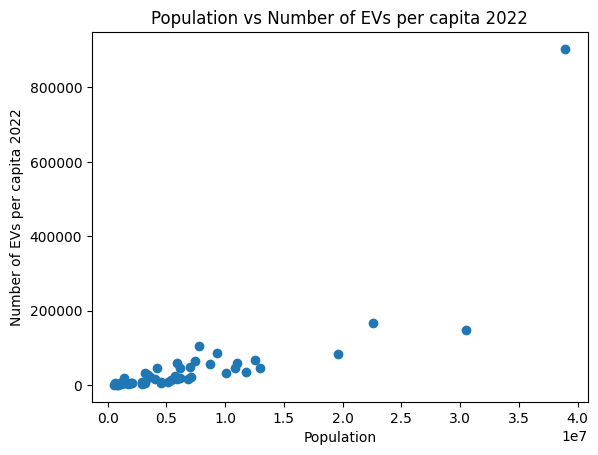

In [145]:
#plot population vs number of EVs per capita 2022
#multiply X by y unitwise to get the number of EVs
y = data['Number of Evs per capita 2022']
X = data["Population estimates, July 1, 2023, (V2023)"]
X = X.values.reshape(-1, 1)
y = y.values.reshape(-1, 1)
y = X*y
plt.scatter(X, y)
plt.title('Population vs Number of EVs per capita 2022')
plt.xlabel('Population')
plt.ylabel('Number of EVs per capita 2022')
plt.show()

Outlier is California

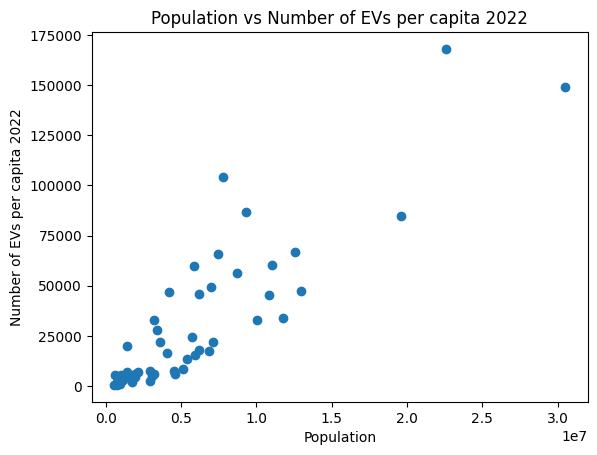

In [146]:
#plot population vs number of EVs per capita 2022
#multiply X by y unitwise to get the number of EVs
y = data['Number of Evs per capita 2022']
X = data["Population estimates, July 1, 2023, (V2023)"]
X = X.values.reshape(-1, 1)
y = y.values.reshape(-1, 1)
y = X*y
X = np.delete(X, 4, axis=0)
y = np.delete(y, 4, axis=0)
plt.scatter(X, y)
plt.title('Population vs Number of EVs per capita 2022')
plt.xlabel('Population')
plt.ylabel('Number of EVs per capita 2022')
plt.show()


In [147]:
model, train_r2, test_r2 = run_linear_regression(X, y)

# Print coefficients of initial regression
print("Initial coefficients:", model.coef_)
print("Initial train R2:", train_r2)
print("Initial test R2:", test_r2)

Initial coefficients: [[0.00539977]]
Initial train R2: 0.8247632765886745
Initial test R2: 0.4513326151513387
